In [1]:
import nltk, urllib
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import word_tokenize, pos_tag, ne_chunk, punkt
from requests import get
import matplotlib.pyplot as plt

from nltk.tag import pos_tag

In [2]:
# Create input.txt file if not already created
file = open('input.txt', 'a+', encoding='utf-8')

In [3]:
# Extract Data from url link
url = "https://en.wikipedia.org/wiki/Natural_language_processing"
content = urllib.request.urlopen(url)

# Parse HTML document
soup = BeautifulSoup(content, "html.parser")
body = soup.find('div', {'class': 'mw-parser-output'})
file.write(str(body.text))

49866

In [4]:
# Read from file
sentence = open('input.txt', encoding="utf8").read()

In [5]:
#Tokenization

from nltk import sent_tokenize, word_tokenize
nltk.download('punkt')


sentence_tokens = sent_tokenize(sentence)
word_tokens = word_tokenize(sentence)

#print(sentence_tokens)
#print("\n")
#print(word_tokens)


# Print first 3 sentence
sentence_token_count = 0
for sent_token in sentence_tokens:
    sentence_token_count += 1
    if sentence_token_count < 4:
        print("sentence token", sentence_token_count, ": ", sent_token)
        print()


# Print first 3 words from first sentence
word_token_count = 0
for word_token in word_tokens:
    word_token_count += 1
    if word_token_count < 4:
        print("word token",word_token_count, ": ", word_token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
sentence token 1 :  .mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}This article is about natural language processing done by computers.

sentence token 2 :  For the natural language processing done by the human brain, see Language processing in the brain.

sentence token 3 :  Field of computer science and linguistics
 An automated online assistant providing customer service on a web page, an example of an application where natural language processing is a major component.

word token 1 :  .mw-parser-output
word token 2 :  .hatnote
word token 3 :  {


In [6]:
#Part Of Speach (POS)
nltk.download('averaged_perceptron_tagger')


pos = word_tokenize(sentence)
print(pos_tag(pos))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('.mw-parser-output', 'JJ'), ('.hatnote', 'NNP'), ('{', '('), ('font-style', 'JJ'), (':', ':'), ('italic', 'JJ'), ('}', ')'), ('.mw-parser-output', 'JJ'), ('div.hatnote', 'JJ'), ('{', '('), ('padding-left:1.6em', 'JJ'), (';', ':'), ('margin-bottom:0.5em', 'JJ'), ('}', ')'), ('.mw-parser-output', 'JJ'), ('.hatnote', 'NN'), ('i', 'NN'), ('{', '('), ('font-style', 'JJ'), (':', ':'), ('normal', 'JJ'), ('}', ')'), ('.mw-parser-output', 'JJ'), ('.hatnote+link+.hatnote', 'JJ'), ('{', '('), ('margin-top', 'JJ'), (':', ':'), ('-0.5em', 'NN'), ('}', ')'), ('This', 'DT'), ('article', 'NN'), ('is', 'VBZ'), ('about', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'VBG'), ('done', 'VBN'), ('by', 'IN'), ('computers', 'NNS'), ('.', '.'), ('For', 'IN'), ('the', 'DT'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'VBG'), 

In [7]:
#Stemming

p_stemmer = PorterStemmer()
l_stemmer = LancasterStemmer()
s_stemmer = SnowballStemmer('english')

word_token_count = 0
for word_token in word_tokens:
    word_token_count += 1
    if word_token_count < 4:
        print("PorterStemmer: ", p_stemmer.stem(word_token),"\n","LancasterStemmer: ",l_stemmer.stem(word_token),"\n","SnowballStemmer: ",s_stemmer.stem(word_token),"\n")

PorterStemmer:  .mw-parser-output 
 LancasterStemmer:  .mw-parser-output 
 SnowballStemmer:  .mw-parser-output 

PorterStemmer:  .hatnot 
 LancasterStemmer:  .hatnote 
 SnowballStemmer:  .hatnot 

PorterStemmer:  { 
 LancasterStemmer:  { 
 SnowballStemmer:  { 



In [8]:
#Personal Notes: The only major thing to note is that lemmatize takes a part of speech parameter, "pos." If not supplied, the default is "noun." This means that an attempt will be made to find the closest noun, which can create trouble for you. Keep this in mind if you use lemmatizing!


#Lemmatization
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

word_token_count = 0
for word_token in word_tokens:
  word_token_count += 1
  if word_token_count < 11:
    print("Lemmatizer:",word_token_count, ": ", lemmatizer.lemmatize(word_token, pos="a"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatizer: 1 :  .mw-parser-output
Lemmatizer: 2 :  .hatnote
Lemmatizer: 3 :  {
Lemmatizer: 4 :  font-style
Lemmatizer: 5 :  :
Lemmatizer: 6 :  italic
Lemmatizer: 7 :  }
Lemmatizer: 8 :  .mw-parser-output
Lemmatizer: 9 :  div.hatnote
Lemmatizer: 10 :  {


In [9]:
#Trigram

sent_token_count = 0
for sentence_token in sentence_tokens:
    sent_token_count += 1
    if sent_token_count < 2:
        token = nltk.word_tokenize(sentence_token)
        trigrams = list(ngrams(token, 3))
        print(trigrams)

[('.mw-parser-output', '.hatnote', '{'), ('.hatnote', '{', 'font-style'), ('{', 'font-style', ':'), ('font-style', ':', 'italic'), (':', 'italic', '}'), ('italic', '}', '.mw-parser-output'), ('}', '.mw-parser-output', 'div.hatnote'), ('.mw-parser-output', 'div.hatnote', '{'), ('div.hatnote', '{', 'padding-left:1.6em'), ('{', 'padding-left:1.6em', ';'), ('padding-left:1.6em', ';', 'margin-bottom:0.5em'), (';', 'margin-bottom:0.5em', '}'), ('margin-bottom:0.5em', '}', '.mw-parser-output'), ('}', '.mw-parser-output', '.hatnote'), ('.mw-parser-output', '.hatnote', 'i'), ('.hatnote', 'i', '{'), ('i', '{', 'font-style'), ('{', 'font-style', ':'), ('font-style', ':', 'normal'), (':', 'normal', '}'), ('normal', '}', '.mw-parser-output'), ('}', '.mw-parser-output', '.hatnote+link+.hatnote'), ('.mw-parser-output', '.hatnote+link+.hatnote', '{'), ('.hatnote+link+.hatnote', '{', 'margin-top'), ('{', 'margin-top', ':'), ('margin-top', ':', '-0.5em'), (':', '-0.5em', '}'), ('-0.5em', '}', 'This'), (

In [10]:
# Named Entity Recognition
nltk.download('maxent_ne_chunker')
nltk.download('words')

sent_token_count = 0
for sentence_token in sentence_tokens:
    sent_token_count += 1
    if sent_token_count < 2:
        print(ne_chunk(pos_tag(word_tokenize(sentence_token))))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  .mw-parser-output/JJ
  .hatnote/NNP
  {/(
  font-style/JJ
  :/:
  italic/JJ
  }/)
  .mw-parser-output/JJ
  div.hatnote/JJ
  {/(
  padding-left:1.6em/JJ
  ;/:
  margin-bottom:0.5em/JJ
  }/)
  .mw-parser-output/JJ
  .hatnote/NN
  i/NN
  {/(
  font-style/JJ
  :/:
  normal/JJ
  }/)
  .mw-parser-output/JJ
  .hatnote+link+.hatnote/JJ
  {/(
  margin-top/JJ
  :/:
  -0.5em/NN
  }/)
  This/DT
  article/NN
  is/VBZ
  about/IN
  natural/JJ
  language/NN
  processing/VBG
  done/VBN
  by/IN
  computers/NNS
  ./.)


[('of', 273), ('the', 243), ('a', 142), ('and', 140), ('to', 101), ('in', 94), ('is', 80), ('language', 77), ('mw', 74), ('output', 74)]


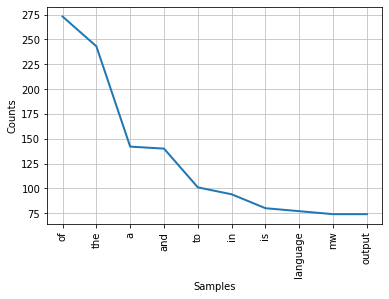

In [11]:
#Print and Plot the Frequencies of words

#I used nltk.RegexpTokenizer() to remove all punctuations
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(sentence)

# creating Freqency Distribution function for the tokenize words.
fd = nltk.FreqDist(new_words)
#print most 10 common words
print(fd.most_common(10))

#plot it
v=fd.plot(10, cumulative=False)
plt.show()